In [1]:
#とりあえずライブラリを読み込む
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#csvファイルをダウンロードして
titanic_df = pd.read_csv('train1.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


これらのデータから有用な知見を得るために、明確な目標があった方がいい。  
以下具体的な問いの設定  
1.)タイタニック号の乗客はどのような人達だったのか？  
2.)それぞれの乗客はどのデッキにいたのか？また、それは客室の種類とどのような関係にあったか？  
3.)乗客は主にどこから来たのか?  
4.)家族連れか、単身者か？  
これらの基本的な問いの後に、さらに深くデータ解析を進めます。  
5.)沈没からの生還者には、どのような要因があったのか？  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

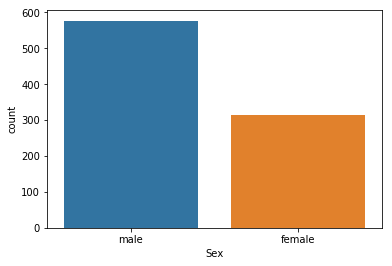

In [6]:
#データの列の名前を指定するだけで、その列で全体を分けて、男性が多かったことがわかる
sns.countplot('Sex',data=titanic_df)

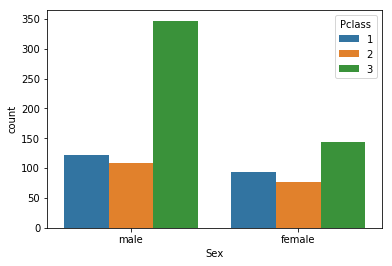

In [7]:
#男性、女性の列を客席のクラスで層別化する。hue
sns.countplot('Sex',data=titanic_df,hue='Pclass')

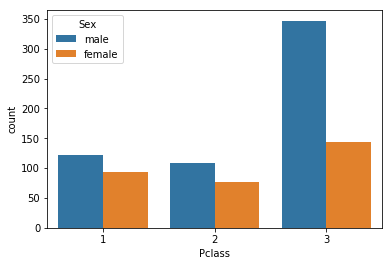

In [8]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [9]:
#子供という概念を導入してみる
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

#applyで新しく定義した子供という概念を適用させる
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


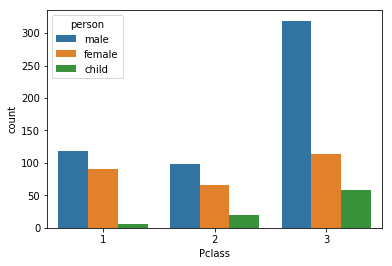

In [11]:
sns.countplot('Pclass',data=titanic_df,hue='person')

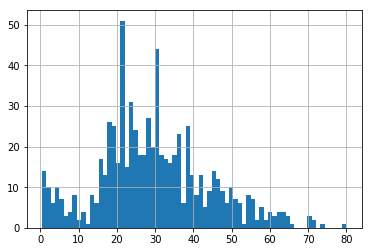

In [12]:
#pandasでは列名を指定して、histを取ればヒストグラムがかける。
titanic_df['Age'].hist (bins=70)

In [13]:
titanic_df['Age'].mean()

29.69911764705882

In [14]:
#value_counts()でその列に含まれている属性の人々がどれほどいるかということがわかる
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

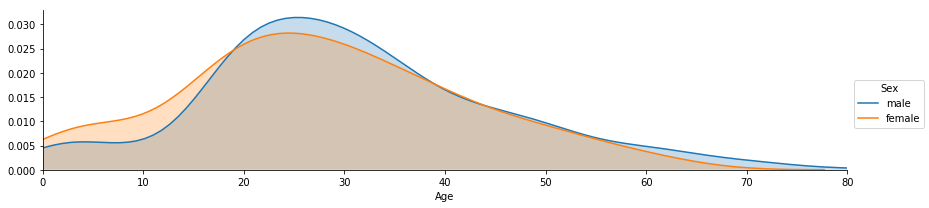

In [15]:
#もう少しわかりやすいようにデータの性質を描画
#kbplotを使う。seabornのFacetGridでいくつかの画面を一つのプロットにかける
#hueはSexで層別化、aspectはグラフの長さ
#カーネル密度推定はAge
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
#最高齢の方を選び出しておいて、figureをくぎるようにしておく⇦マイナスなど無駄な軸をなくすため
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

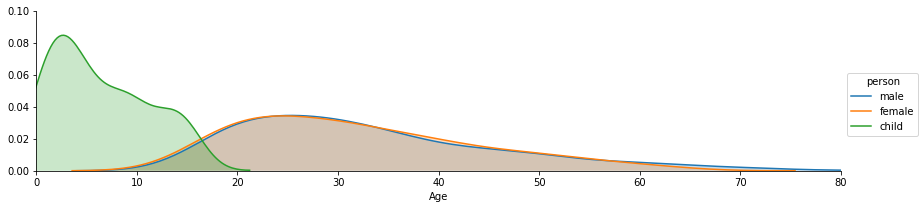

In [16]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.10))
fig.add_legend()

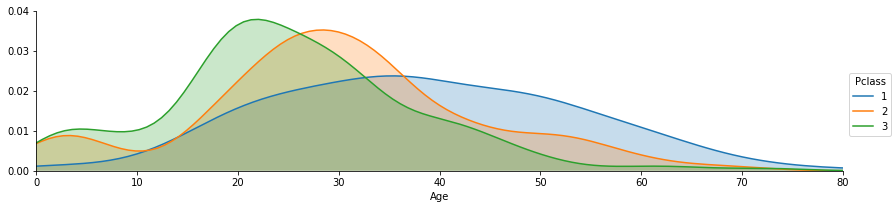

In [17]:
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.04))
fig.add_legend()

In [18]:
#乗っていた場所がどういう分布だったか見る
deck = titanic_df['Cabin'].dropna()

In [19]:
type(deck)
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [20]:
levels = []
for level in deck:
    levels.append(level[0])

In [21]:
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [22]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

In [23]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


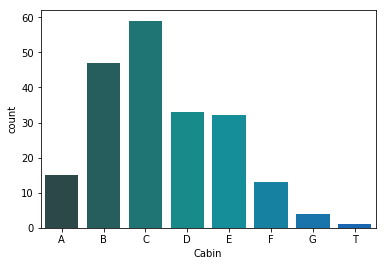

In [24]:
#snsのcounuplotでどこにどれくらいの人がいたのかを見る,paletteは色合い,orderでlevelsとしてさっき指定した要素をlistにしてsortedで並び替えておく
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

Cは広いとこで、Tは間違いのデータ??

In [25]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

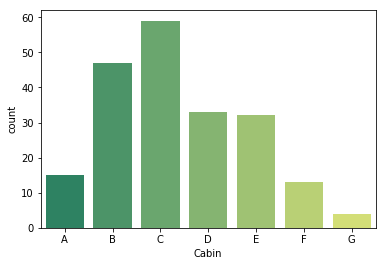

In [26]:
#間違えたデータであろうTを取り除く
sns.countplot('Cabin',data=cabin_df,palette='summer',order=sorted(set(cabin_df.Cabin)))

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


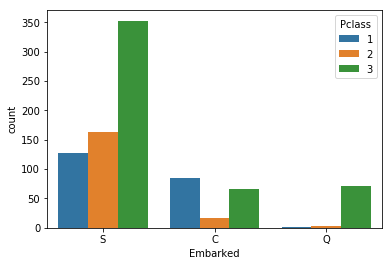

In [28]:
#乗り込んだ場所を元にデータ解析(Embarked),層別化はhueでPclass(客室のランク)
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [29]:
from collections import Counter

In [30]:
#Counterで数を出せる
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [31]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

家族連れ、単身者という属性がどのようなものだったか

In [32]:
#0の人は一人だったということ
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [33]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]  = "Withfamily"
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/zxbp2w/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


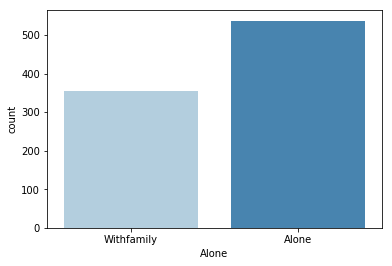

In [34]:
#とりあえずcountplotで一人かどうか調べる
sns.countplot('Alone',data=titanic_df,palette='Blues')

In [35]:
#mapにより辞書型を用いて、０ならno,1ならyesとする
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

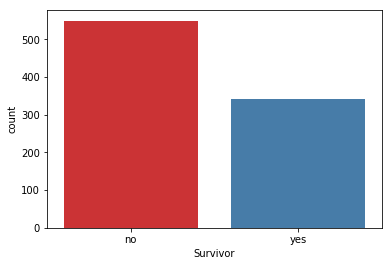

In [36]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

だいぶ大勢の人が亡くなっている

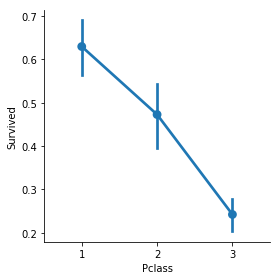

In [37]:
#乗客の客室のランクと生還したかどうかのグラフ,factorplotは確率
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3])

やはりランクが高い方が、生き残る確率が高い

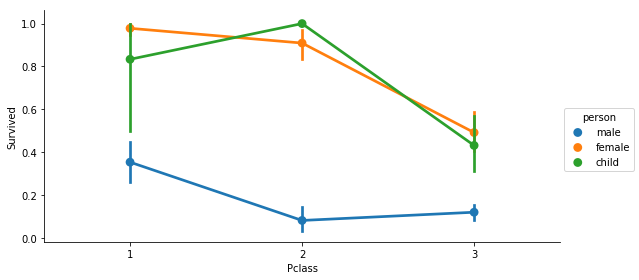

In [38]:
#しかし、3は男性の客が多かったので、事件時に女性と子供を先に脱出させたということもあり、それが原因なのかもしれない(aspectで横に長くする)
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df,order=[1,2,3],aspect=2)

ランクが下がるとやはり生存率は下がって、男性であることはやはり、客室に関わらず生存率が下がる要因となっている　　
例えば、2等客室全体では1等客室より生存率は下がるが、女性と子供の生存率はあまり変わっていない。

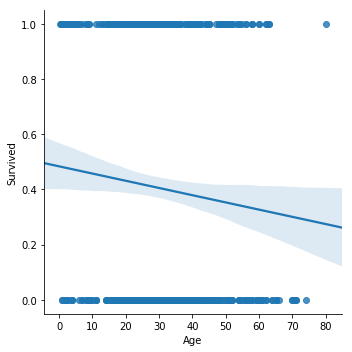

In [39]:
#生存率と年齢というのをプロットしてみる
#lmplotで図示できる
sns.lmplot('Age','Survived',data=titanic_df)

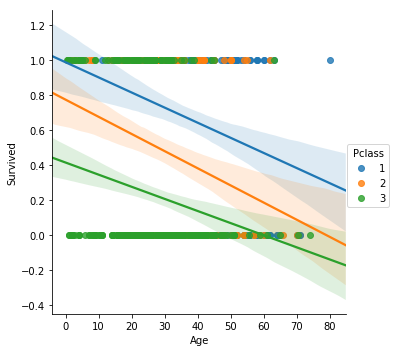

In [40]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,hue_order=[1,2,3])

やはり客室のランクによって生存率が下がっている

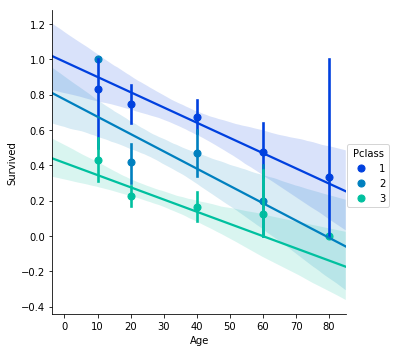

In [41]:
generations = [10,20,40,60,80]#年代ごとにまとめる
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette = 'winter',
           hue_order=[1,2,3],x_bins=generations)

80代の非常に高齢の方の生存率は低いが、標準偏差が高いので、何か特別な人がいて、真っ先に助けられたのではないか？？？

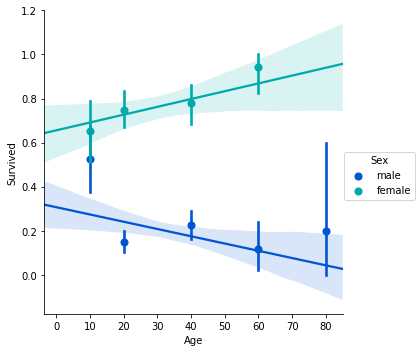

In [42]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette = 'winter',
           x_bins=generations)

女性は年齢が上がるほど、生存率が上がった。
男性の80代はもちろん高齢者として、全体の生存率は下がっているが、何か特別なグループがいて、金持ちかな？の生存率が飛び抜けている

### ここまでで、最初に決めた、1,2,3,4,5がわかった
## 解析をしようと思ったら、データをみて何か問いを立ててみて、それに応えるようにデータの解析を進める。その中でどのようなツールを使えばいいのかを考える。